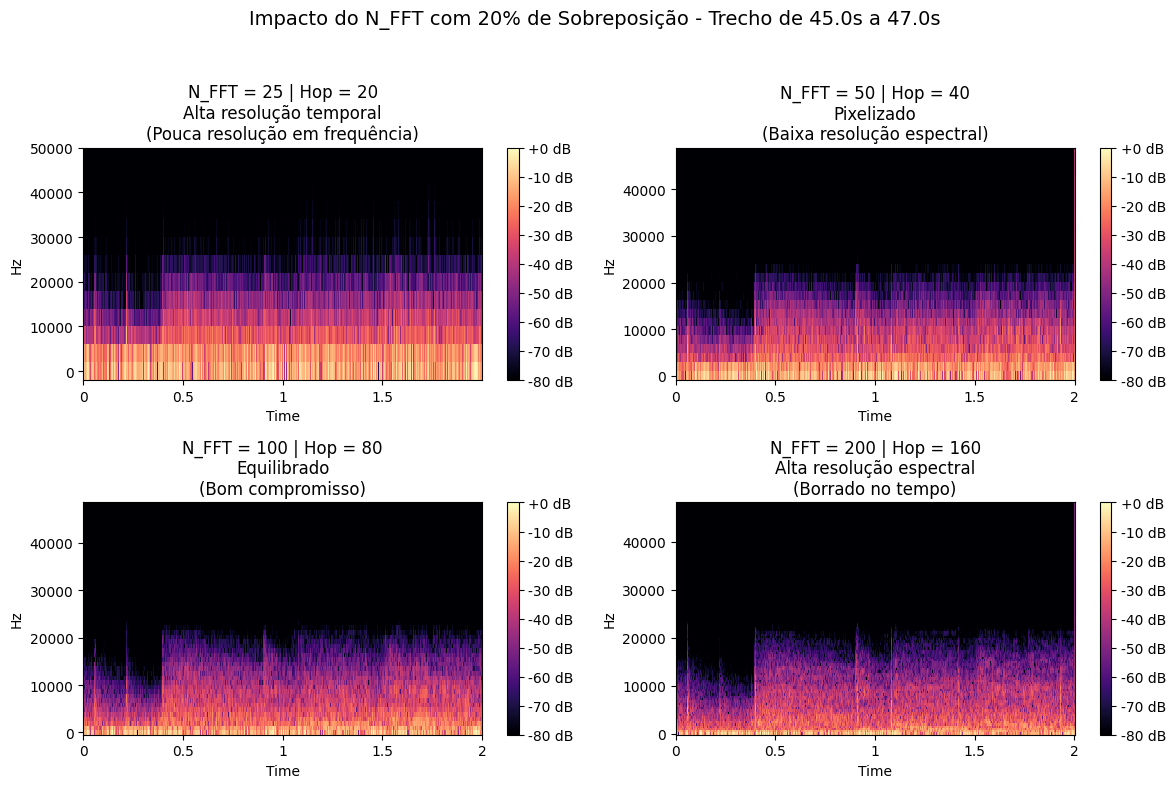

In [21]:
import matplotlib.pyplot as plt
import os
import numpy as np
import librosa
import librosa.display

def comparar_nfft_em_trecho(audio_path, inicio_segundos=45.0, duracao_segundos=2.0):
    # Carrega apenas o trecho desejado
    y, sr = librosa.load(audio_path, sr=None, mono=True, offset=inicio_segundos, duration=duracao_segundos)
    
    # Quatro tamanhos de N_FFT (resoluções diferentes)
    nfft_values = [25, 50, 100, 200]

    # Descrições para cada N_FFT
    descricoes = {
        25: "Alta resolução temporal\n(Pouca resolução em frequência)",
        50: "Pixelizado\n(Baixa resolução espectral)",
        100: "Equilibrado\n(Bom compromisso)",
        200: "Alta resolução espectral\n(Borrado no tempo)"
    }

    plt.figure(figsize=(12, 8))

    for idx, n_fft in enumerate(nfft_values):
        # Para cada n_fft, usamos hop_length com 20% de sobreposição
        hop_length = int(n_fft * 0.8)  # 20% de sobreposição

        # Calcula o STFT
        S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
        S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

        # Organiza o gráfico em 2x2
        plt.subplot(2, 2, idx + 1)
        librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'N_FFT = {n_fft} | Hop = {hop_length}\n{descricoes.get(n_fft, "")}')

    plt.suptitle(f'Impacto do N_FFT com 20% de Sobreposição - Trecho de {inicio_segundos:.1f}s a {inicio_segundos+duracao_segundos:.1f}s', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não cortar o título
    plt.show()

# ----------- Exemplo de uso -----------
input_audio = '13 - Impatient.wav'  # Substitua pelo seu arquivo real

if os.path.exists(input_audio):
    comparar_nfft_em_trecho(input_audio, inicio_segundos=45.0, duracao_segundos=2.0)
else:
    print(f"Arquivo '{input_audio}' não encontrado. Verifique o caminho.")
